## Multicollinearity test with final model 

Scenario - Add to Final Draft after Feature Ranking with RFE

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
X = (predictors[selected_columns])
X = X.drop(['bathrooms', 'bedrooms',  'Miles_Seattle'], axis =1)
X_col = selected_columns.drop(['bathrooms', 'bedrooms',   'Miles_Seattle'])
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X_col, vif))

[('sqft_living', 10.644489842525463),
 ('sqft_lot', 9.6970665970941),
 ('waterfront_1', 1.01203976626201),
 ('north_Seattle_1', 1.7691831683117163),
 ('near_Bellevue_1', 1.177415172605023),
 ('hi_zip_1', 1.298168039842188),
 ('low_zip_1', 1.169442902236005)]

In [172]:
linreg.fit(predictors[X_col],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
yhat = linreg.predict(X)

In [174]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-predictors[selected_columns].shape[1]-1)

In [175]:
r_squared

price    0.701133
dtype: float64

In [177]:
predictors = '+'.join(X_col)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     7234.
Date:                Sun, 23 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:50:10   Log-Likelihood:                 29165.
No. Observations:               21592   AIC:                        -5.831e+04
Df Residuals:                   21584   BIC:                        -5.825e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1023      0.002     51.914      0.000       0.098       0.106
sqft_living         0.5823      0.004    147.781      0.000       0.575       0.590
sqft_lot           -0.0267      0.004     -6.947      0.000      -0.034      -0.019
waterfront_1        0.1880      0.006     33.390      0.000       0.177       0.199
north_Seattle_1     0.0639      0.001     70.843      0.000       0.062       0.066
near_Bellevue_1     0.0600      0.003     20.199      0.000       0.054       0.066
hi_zip_1            0.0945      0.002     56.970      0.000       0.091       0.098
low_zip_1          -0.0772      0.002    -49.287      0.000      -0.080      -0.074
==============================================================================
Omnibus:                      200.825   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.308
Skew:                           0.191   Prob(JB):                     4.37e-50
Kurtosis:                       3.328   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

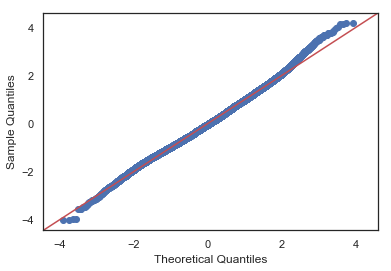

In [178]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)